In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.nn as nn
import pandas as pd

Using device: cpu


  0%|                                                 | 0/30000 [00:00<?, ?it/s]

[0] m_t: mean=0.6430, min=0.3681, max=0.9981
[0] grad norm: 0.861382
Step     0 | θ = [ 0.00034419 -0.00078264] | error = 2.2352


  8%|██▋                                | 2326/30000 [00:00<00:02, 12015.26it/s]

Step  1000 | θ = [ 0.31270278 -0.6248591 ] | error = 1.5373
Step  2000 | θ = [ 0.5285095 -1.0548469] | error = 1.0562


 12%|████▎                              | 3661/30000 [00:00<00:02, 12619.07it/s]

Step  3000 | θ = [ 0.6748738 -1.3510805] | error = 0.7258


 17%|█████▊                             | 5009/30000 [00:00<00:01, 12955.38it/s]

Step  4000 | θ = [ 0.7767583 -1.5531483] | error = 0.4995
Step  5000 | θ = [ 0.84746987 -1.6932727 ] | error = 0.3426


 21%|███████▍                           | 6341/30000 [00:00<00:01, 13086.16it/s]

Step  6000 | θ = [ 0.8949372 -1.7903572] | error = 0.2345


 26%|████████▉                          | 7650/30000 [00:00<00:01, 12948.87it/s]

Step  7000 | θ = [ 0.9270438 -1.8536226] | error = 0.1636
Step  8000 | θ = [ 0.950392  -1.9001426] | error = 0.1115


 30%|██████████▍                        | 8946/30000 [00:00<00:01, 12930.62it/s]

Step  9000 | θ = [ 0.9683225 -1.9295149] | error = 0.0773


 39%|█████████████▏                    | 11681/30000 [00:00<00:01, 13350.43it/s]

[10000] m_t: mean=0.6363, min=0.3680, max=0.9986
[10000] grad norm: 0.065646
Step 10000 | θ = [ 0.97934204 -1.9507558 ] | error = 0.0534
Step 11000 | θ = [ 0.98494416 -1.9659144 ] | error = 0.0373
Step 12000 | θ = [ 0.9899003 -1.9754586] | error = 0.0265


 48%|████████████████▎                 | 14401/30000 [00:01<00:01, 13489.54it/s]

Step 13000 | θ = [ 0.9932339 -1.9854558] | error = 0.0160
Step 14000 | θ = [ 0.9951705 -1.9912916] | error = 0.0100
Step 15000 | θ = [ 0.995674  -1.9912205] | error = 0.0098


 57%|███████████████████▍              | 17116/30000 [00:01<00:00, 13486.12it/s]

Step 16000 | θ = [ 0.9950399 -1.9955897] | error = 0.0066
Step 17000 | θ = [ 0.9958152 -1.9960921] | error = 0.0057


 62%|████████████████████▉             | 18465/30000 [00:01<00:00, 13359.73it/s]

Step 18000 | θ = [ 0.9954512 -1.9970633] | error = 0.0054


 66%|██████████████████████▍           | 19828/30000 [00:01<00:00, 13438.63it/s]

Step 19000 | θ = [ 0.99602836 -1.9974487 ] | error = 0.0047
[20000] m_t: mean=0.6319, min=0.3680, max=0.9677
[20000] grad norm: 0.029974
Step 20000 | θ = [ 0.9992441 -1.9969652] | error = 0.0031


 71%|███████████████████████▉          | 21173/30000 [00:01<00:00, 13434.84it/s]

Step 21000 | θ = [ 1.0001901 -1.9981533] | error = 0.0019


 75%|█████████████████████████▌        | 22537/30000 [00:01<00:00, 13493.62it/s]

Step 22000 | θ = [ 1.0015672 -2.0004785] | error = 0.0016
Step 23000 | θ = [ 1.0009445 -1.9999691] | error = 0.0009


 80%|███████████████████████████       | 23897/30000 [00:01<00:00, 13524.34it/s]

Step 24000 | θ = [ 1.0033655 -1.9982982] | error = 0.0038


 89%|██████████████████████████████▏   | 26583/30000 [00:02<00:00, 13295.35it/s]

Step 25000 | θ = [ 1.0016867 -1.9990664] | error = 0.0019
Step 26000 | θ = [ 1.000371  -1.9987793] | error = 0.0013
Step 27000 | θ = [ 0.99972224 -1.9975796 ] | error = 0.0024


 97%|█████████████████████████████████▏| 29243/30000 [00:02<00:00, 13093.17it/s]

Step 28000 | θ = [ 0.9980417 -1.9975324] | error = 0.0032
Step 29000 | θ = [ 0.9974035 -1.9962329] | error = 0.0046


100%|██████████████████████████████████| 30000/30000 [00:02<00:00, 13181.93it/s]


Final θ estimate (avg over last 100): [ 0.9982222 -1.9970262]
True μ = [ 1. -2.]


Text(0.5, 1.0, 'Trajectory of θ')

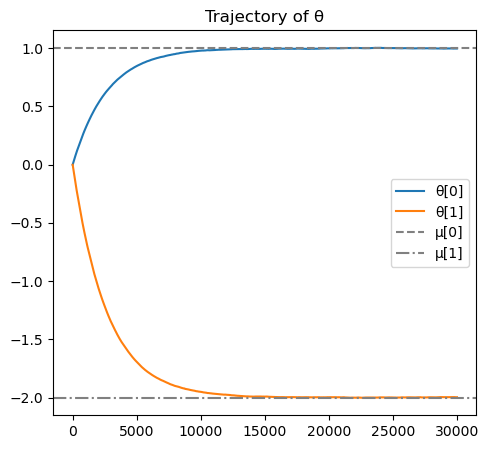

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

dim = 2
mu_true = torch.tensor([1.0, -2.0], device=device)
beta = 10**8
initial_lr = 1e-3
total_steps = 30000
avg_window = 100

def simulate_xt(x0, t):
    m_t = torch.exp(-t)
    sigma_t = torch.sqrt(1 - torch.exp(-2 * t))
    z = torch.randn_like(x0)
    xt = m_t[:, None] * x0 + sigma_t[:, None] * z
    return xt, z, m_t, sigma_t

def sgld_step(theta, step, batch, beta):
    tau, x0, z = batch
    m_t = torch.exp(-tau)
    sigma_t = torch.sqrt(1 - torch.exp(-2 * tau))
    if step % 10000 == 0:
        print(f"[{step}] m_t: mean={m_t.mean():.4f}, min={m_t.min():.4f}, max={m_t.max():.4f}")

    sigma_inv = 1.0 / sigma_t[:, None]

    grad_terms = sigma_inv * z - m_t[:, None] * x0 - sigma_t[:, None] * z + m_t[:, None] * theta
    coeff = 2 * m_t * sigma_t**2
    grad = coeff[:, None] * grad_terms
    grad = grad.mean(dim=0)

    lr = initial_lr

    noise = torch.randn_like(theta)
    theta_next = theta - lr * grad + torch.sqrt(torch.tensor(2 * lr / beta, device=theta.device)) * noise
    if step % 10000 == 0:
        print(f"[{step}] grad norm: {grad.norm().item():.6f}")

    return theta_next

def get_data_loader(mu, batch_size=128, dim=2):
    while True:
        yield torch.randn(batch_size, dim, device=device) + mu


theta = torch.zeros(dim, device=device)
theta_history = []
error_history = []
data = get_data_loader(mu=mu_true, batch_size=128, dim=dim)

for step in tqdm(range(total_steps)):
    tau = torch.rand(128, device=device) * (1.0 - 1e-3) + 1e-3 
    x0 = next(data)
    _, z, _, _ = simulate_xt(x0, tau)
    batch = (tau, x0, z)

    theta = sgld_step(theta, step, batch, beta)

    err = torch.norm(theta - mu_true).item()

    theta_history.append(theta.detach().cpu().numpy())
    error_history.append(err)

    if step % 1000 == 0:
        print(f"Step {step:5d} | θ = {theta.cpu().numpy()} | error = {err:.4f}")

theta_np = np.array(theta_history)
theta_avg = np.mean(theta_np[-avg_window:], axis=0)

print(f"\nFinal θ estimate (avg over last {avg_window}): {theta_avg}")
print(f"True μ = {mu_true.cpu().numpy()}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(theta_np[:, 0], label='θ[0]')
plt.plot(theta_np[:, 1], label='θ[1]')
plt.axhline(mu_true[0].item(), color='grey', linestyle='--', label='μ[0]')
plt.axhline(mu_true[1].item(), color='grey', linestyle='-.', label='μ[1]')
plt.legend()
plt.title("Trajectory of θ")



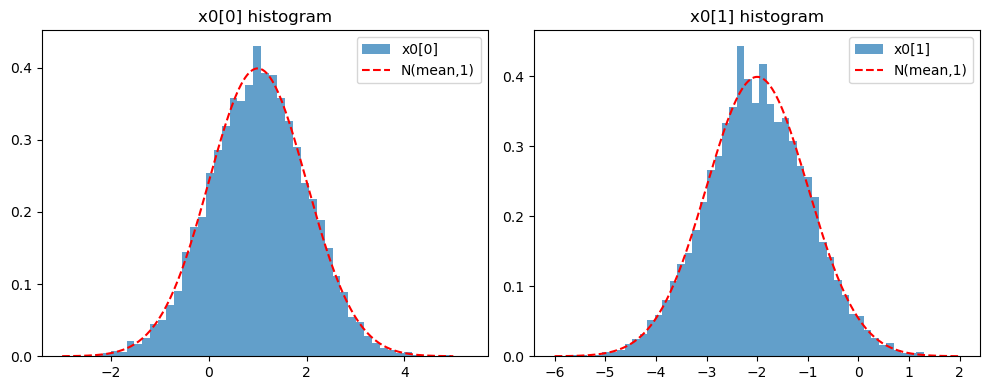

In [6]:
big_batch = next(get_data_loader(mu=mu_true, batch_size=10000, dim=dim))

plt.figure(figsize=(10,4))

for i in range(dim):
    plt.subplot(1, dim, i+1)
    plt.hist(big_batch[:,i].cpu().numpy(), bins=50, density=True, alpha=0.7, label=f"x0[{i}]")
    
    from scipy.stats import norm
    x_vals = np.linspace(mu_true[i].item()-4, mu_true[i].item()+4, 200)
    plt.plot(x_vals, norm.pdf(x_vals, loc=mu_true[i].item(), scale=1.0), 'r--', label="N(mean,1)")
    
    plt.title(f"x0[{i}] histogram")
    plt.legend()

plt.tight_layout()
plt.show()


100%|█████████████████████████████████████| 2000/2000 [00:00<00:00, 5590.00it/s]


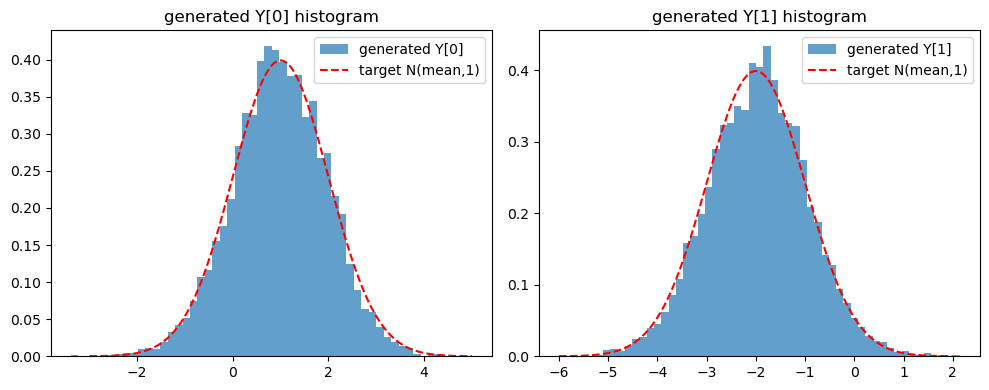

In [7]:
N_samples = 5000
gamma = 1e-3
K = 2000
T = 2.0
timesteps = np.linspace(0, T, K+1)

Y0_batch = torch.randn(N_samples, dim, device=device)

Y_all = Y0_batch.clone()

theta_hat = theta.clone().detach()

for k in tqdm(range(K)):
    t_k = timesteps[k]
    tau = torch.tensor([T - t_k], device=device)

    m_t = torch.exp(-tau)
    sigma_t = torch.sqrt(1 - torch.exp(-2 * tau))

    s_val = - Y_all + m_t * theta_hat

    drift = Y_all + 2 * s_val
    noise = torch.randn_like(Y_all)

    Y_all = Y_all + gamma * drift + torch.sqrt(torch.tensor(2*gamma)) * noise

samples = Y_all.detach().cpu().numpy()

plt.figure(figsize=(10,4))
for i in range(dim):
    plt.subplot(1, dim, i+1)
    plt.hist(samples[:,i], bins=50, density=True, alpha=0.7, label=f"generated Y[{i}]")

    from scipy.stats import norm
    x_vals = np.linspace(mu_true[i].item()-4, mu_true[i].item()+4, 200)
    plt.plot(x_vals, norm.pdf(x_vals, loc=mu_true[i].item(), scale=1.0), 'r--', label="target N(mean,1)")

    plt.title(f"generated Y[{i}] histogram")
    plt.legend()

plt.tight_layout()
plt.show()


In [12]:
w2_x0 = abs((mu_true[0]-theta[0]).item())
w2_x1 = abs((mu_true[1]-theta[1]).item())


print(f"1D W2 X[0]: {float(w2_x0):.6f}")
print(f"1D W2 X[1]: {float(w2_x1):.6f}")


1D W2 X[0]: 0.001929
1D W2 X[1]: 0.003003


Using device: cpu


  4%|█▍                                 | 1208/30000 [00:00<00:02, 12075.52it/s]

[0] grad norm: 0.505578 | theta: [0. 0.]
Step     0 | θ = [ 0.00025686 -0.00043835] | error = 2.2356
Step  1000 | θ = [ 0.20925975 -0.41948587] | error = 1.7673
Step  2000 | θ = [ 0.3773595 -0.7530942] | error = 1.3937


 18%|██████▎                            | 5399/30000 [00:00<00:01, 13723.95it/s]

Step  3000 | θ = [ 0.5084747 -1.016177 ] | error = 1.0998
Step  4000 | θ = [ 0.61252093 -1.2242601 ] | error = 0.8671
[5000] grad norm: 0.177947 | theta: [ 0.6915977 -1.3886523]
Step  5000 | θ = [ 0.69168997 -1.3887978 ] | error = 0.6846


 27%|█████████▌                         | 8146/30000 [00:00<00:01, 13578.82it/s]

Step  6000 | θ = [ 0.75503314 -1.5166559 ] | error = 0.5419
Step  7000 | θ = [ 0.8065667 -1.6202636] | error = 0.4262
Step  8000 | θ = [ 0.84785676 -1.7029829 ] | error = 0.3337


 36%|████████████▎                     | 10894/30000 [00:00<00:01, 13635.87it/s]

Step  9000 | θ = [ 0.8792902 -1.765208 ] | error = 0.2640
[10000] grad norm: 0.099476 | theta: [ 0.9035936 -1.8142048]
Step 10000 | θ = [ 0.9035414 -1.8142838] | error = 0.2093
Step 11000 | θ = [ 0.92570794 -1.853662  ] | error = 0.1641


 46%|███████████████▌                  | 13757/30000 [00:01<00:01, 13996.60it/s]

Step 12000 | θ = [ 0.9411215 -1.8846723] | error = 0.1295
Step 13000 | θ = [ 0.953651  -1.9102395] | error = 0.1010
Step 14000 | θ = [ 0.9627474 -1.9282714] | error = 0.0808


 56%|██████████████████▉               | 16657/30000 [00:01<00:00, 14262.91it/s]

[15000] grad norm: 0.045925 | theta: [ 0.96942484 -1.9433907 ]
Step 15000 | θ = [ 0.96942633 -1.9434416 ] | error = 0.0643
Step 16000 | θ = [ 0.97701293 -1.9550077 ] | error = 0.0505
Step 17000 | θ = [ 0.9811725 -1.9627709] | error = 0.0417


 65%|██████████████████████            | 19512/30000 [00:01<00:00, 14227.41it/s]

Step 18000 | θ = [ 0.9872477 -1.9693922] | error = 0.0332
Step 19000 | θ = [ 0.98854625 -1.9753023 ] | error = 0.0272
[20000] grad norm: 0.071010 | theta: [ 0.99068904 -1.9818591 ]
Step 20000 | θ = [ 0.9906361 -1.9819059] | error = 0.0204


 79%|██████████████████████████▉       | 23785/30000 [00:01<00:00, 14119.92it/s]

Step 21000 | θ = [ 0.99311477 -1.9870802 ] | error = 0.0146
Step 22000 | θ = [ 0.99466395 -1.989218  ] | error = 0.0120
Step 23000 | θ = [ 0.9965912 -1.9916428] | error = 0.0090


 89%|██████████████████████████████▏   | 26609/30000 [00:01<00:00, 13969.11it/s]

Step 24000 | θ = [ 0.9991144 -1.9916743] | error = 0.0084
[25000] grad norm: 0.013871 | theta: [ 1.0000129 -1.9933188]
Step 25000 | θ = [ 1.0000026 -1.9933256] | error = 0.0067
Step 26000 | θ = [ 0.99975944 -1.9962002 ] | error = 0.0038


 98%|█████████████████████████████████▎| 29412/30000 [00:02<00:00, 13964.58it/s]

Step 27000 | θ = [ 0.99871624 -1.9986228 ] | error = 0.0019
Step 28000 | θ = [ 0.9984217 -1.9983398] | error = 0.0023
Step 29000 | θ = [ 0.9970374 -2.0007691] | error = 0.0031


100%|██████████████████████████████████| 30000/30000 [00:02<00:00, 13905.65it/s]



Final θ estimate (avg over last 100): [ 0.9971933 -2.002255 ]
True μ = [ 1. -2.]


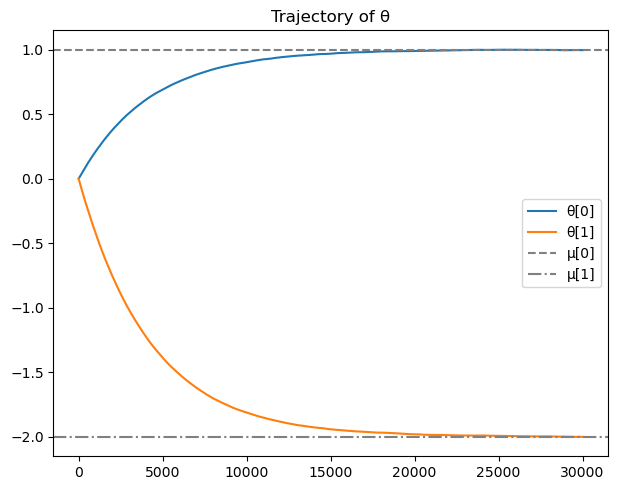

In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

dim = 2
mu_true = torch.tensor([1.0, -2.0], device=device)
beta = 1e8
initial_lr = 1e-3
total_steps = 30000
avg_window = 100

def simulate_xt(x0, t):
    m_t = torch.exp(-t)
    sigma_t = torch.sqrt(1 - torch.exp(-2 * t))
    z = torch.randn_like(x0)
    xt = m_t[:, None] * x0 + sigma_t[:, None] * z
    return xt, z, m_t, sigma_t

def sgld_step(theta, step, batch, beta):
    tau, x0, z = batch

    m_t = torch.exp(-tau)
    sigma_t = torch.sqrt(1 - torch.exp(-2 * tau))

    x_t = m_t[:, None] * x0 + sigma_t[:, None] * z

    s_val = - x_t + m_t[:, None] * theta
    grad_s = m_t[:, None]
    term = (z / sigma_t[:, None]) + s_val
    H = 2 * m_t * sigma_t**2
    grad = (H[:, None] * term * grad_s).mean(dim=0)

    lr = initial_lr
    noise = torch.randn_like(theta)
    theta_next = theta - lr * grad + torch.sqrt(torch.tensor(2 * lr / beta, device=theta.device)) * noise

    if step % 5000 == 0:
        print(f"[{step}] grad norm: {grad.norm().item():.6f} | theta: {theta.cpu().numpy()}")

    return theta_next

def get_data_loader(mu, batch_size=128, dim=2):
    while True:
        yield torch.randn(batch_size, dim, device=device) + mu

theta = torch.zeros(dim, device=device)
theta_history = []
error_history = []
data = get_data_loader(mu=mu_true, batch_size=128, dim=dim)

for step in tqdm(range(total_steps)):
    tau = torch.rand(128, device=device) * (1.0 - 1e-3) + 1e-3 
    x0 = next(data)
    _, z, _, _ = simulate_xt(x0, tau)
    batch = (tau, x0, z)

    theta = sgld_step(theta, step, batch, beta)

    err = torch.norm(theta - mu_true).item()

    theta_history.append(theta.detach().cpu().numpy())
    error_history.append(err)

    if step % 1000 == 0:
        print(f"Step {step:5d} | θ = {theta.cpu().numpy()} | error = {err:.4f}")

theta_np = np.array(theta_history)
theta_avg = np.mean(theta_np[-avg_window:], axis=0)

print(f"\nFinal θ estimate (avg over last {avg_window}): {theta_avg}")
print(f"True μ = {mu_true.cpu().numpy()}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(theta_np[:, 0], label='θ[0]')
plt.plot(theta_np[:, 1], label='θ[1]')
plt.axhline(mu_true[0].item(), color='grey', linestyle='--', label='μ[0]')
plt.axhline(mu_true[1].item(), color='grey', linestyle='-.', label='μ[1]')
plt.legend()
plt.title("Trajectory of θ")

plt.tight_layout()
plt.show()

Using device: cpu


  0%|▏                                          | 1/300 [00:00<00:40,  7.39it/s]

Step     0 | loss = 2.654689 | theta_pred mean = [-0.04173662  0.05308421]


100%|███████████████████████████████████████| 300/300 [00:00<00:00, 1259.94it/s]


Final theta estimate (avg over last 1): [ 1.0071434 -2.0055523]
True mu = [ 1. -2.]


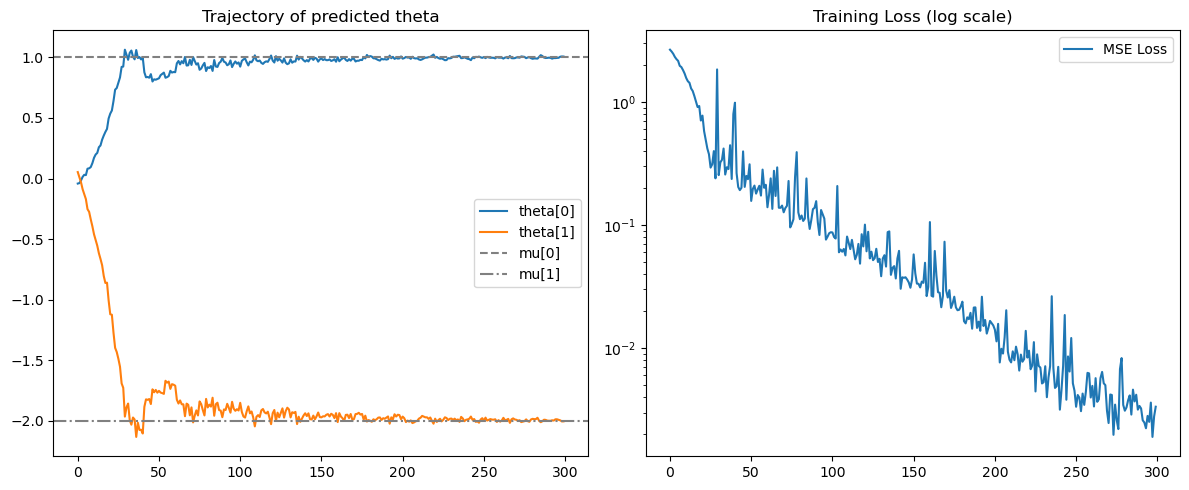

In [14]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

dim = 2
mu_true = torch.tensor([1.0, -2.0], device=device)
total_steps = 300
avg_window = 1
batch_size = 128
beta = 1e8

def simulate_xt(x0, t):
    m_t = torch.exp(-t)
    sigma_t = torch.sqrt(1 - torch.exp(-2 * t))
    z = torch.randn_like(x0)
    xt = m_t[:, None] * x0 + sigma_t[:, None] * z
    return xt, z, m_t, sigma_t

def get_data_loader(mu, batch_size=128, dim=2):
    while True:
        yield torch.randn(batch_size, dim, device=device) + mu

class ThetaPredictor(nn.Module):
    def __init__(self, input_dim=11, hidden_dim=64, output_dim=2):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    def forward(self, x):
        return self.net(x)

model = ThetaPredictor().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

data = get_data_loader(mu=mu_true, batch_size=batch_size, dim=dim)

theta_history = []
loss_history = []
score_history = []
true_score_history = []

for step in tqdm(range(total_steps)):
    tau = torch.rand(batch_size, device=device) * (1.0 - 1e-3) + 1e-3
    x0 = next(data)
    x_t, z, m_t, sigma_t = simulate_xt(x0, tau)

    with torch.no_grad():
        theta_guess = torch.zeros(dim, device=device)
        s_val = -x_t + m_t[:, None] * theta_guess
        term = (z / sigma_t[:, None]) + s_val

    features = torch.cat([
        tau[:, None],           
        m_t[:, None],           
        sigma_t[:, None],       
        x0,                     
        z,                      
        x_t,                    
        term                    
    ], dim=1)  

    theta_pred = model(features)

    target = mu_true.expand_as(theta_pred)
    loss = ((theta_pred - target) ** 2).mean()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    theta_mean = theta_pred.mean(dim=0).detach().cpu().numpy()
    theta_history.append(theta_mean.copy())
    s_pred = -x_t + m_t[:, None] * theta_pred
    score_history.append(s_pred.detach().cpu().numpy())
    s_true = -x_t + m_t[:, None] * mu_true
    s_true_mean = s_true.mean(dim=0).cpu().numpy()
    true_score_history.append(s_true_mean.copy())


    loss_history.append(loss.item())

    if step % 1000 == 0:
        print(f"Step {step:5d} | loss = {loss.item():.6f} | theta_pred mean = {theta_pred.mean(dim=0).detach().cpu().numpy()}")


theta_np = np.array(theta_history)
theta_avg = np.mean(theta_np[-avg_window:], axis=0)

print(f"\nFinal theta estimate (avg over last {avg_window}): {theta_avg}")
print(f"True mu = {mu_true.cpu().numpy()}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(theta_np[:, 0], label='theta[0]')
plt.plot(theta_np[:, 1], label='theta[1]')
plt.axhline(mu_true[0].item(), color='grey', linestyle='--', label='mu[0]')
plt.axhline(mu_true[1].item(), color='grey', linestyle='-.', label='mu[1]')
plt.legend()
plt.title("Trajectory of predicted theta")

plt.subplot(1, 2, 2)
plt.plot(loss_history, label='MSE Loss')
plt.yscale('log')
plt.legend()
plt.title("Training Loss (log scale)")

plt.tight_layout()
plt.show()


In [15]:
with torch.no_grad():
    tau = torch.rand(batch_size, device=device) * (1.0 - 1e-3) + 1e-3
    x0 = next(data)
    x_t, z, m_t, sigma_t = simulate_xt(x0, tau)

    s_val = -x_t + m_t[:, None] * torch.zeros(dim, device=device)  # init theta=0
    term = (z / sigma_t[:, None]) + s_val
    features = torch.cat([
        tau[:, None],
        m_t[:, None],
        sigma_t[:, None],
        x0,
        z,
        x_t,
        term
    ], dim=1)

    theta_pred = model(features)

    s_pred = -x_t + m_t[:, None] * theta_pred

print(f"\nSample score estimate s_pred[0]: {s_pred[0].cpu().numpy()}")


Sample score estimate s_pred[0]: [ 1.1156977  -0.30881065]


100%|█████████████████████████████████████| 2000/2000 [00:00<00:00, 6556.22it/s]


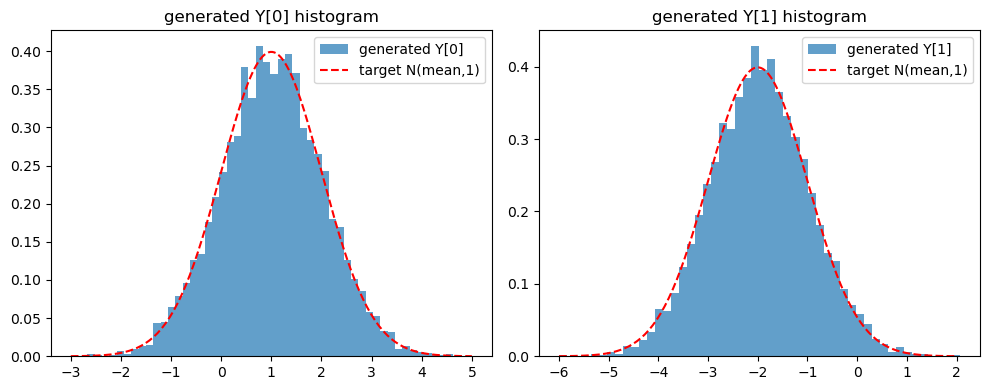

In [16]:
N_samples = 5000
gamma = 1e-3
K = 2000
T = 2.0
timesteps = np.linspace(0, T, K+1)

Y0_batch = torch.randn(N_samples, dim, device=device)

Y_all = Y0_batch.clone()

theta_hat = theta.clone().detach()

for k in tqdm(range(K)):
    t_k = timesteps[k]
    tau = torch.tensor([T - t_k], device=device)

    m_t = torch.exp(-tau)
    sigma_t = torch.sqrt(1 - torch.exp(-2 * tau))

    s_val = - Y_all + m_t * theta_hat

    drift = Y_all + 2 * s_val
    noise = torch.randn_like(Y_all)

    Y_all = Y_all + gamma * drift + torch.sqrt(torch.tensor(2*gamma)) * noise

samples = Y_all.detach().cpu().numpy()

plt.figure(figsize=(10,4))
for i in range(dim):
    plt.subplot(1, dim, i+1)
    plt.hist(samples[:,i], bins=50, density=True, alpha=0.7, label=f"generated Y[{i}]")

    from scipy.stats import norm
    x_vals = np.linspace(mu_true[i].item()-4, mu_true[i].item()+4, 200)
    plt.plot(x_vals, norm.pdf(x_vals, loc=mu_true[i].item(), scale=1.0), 'r--', label="target N(mean,1)")

    plt.title(f"generated Y[{i}] histogram")
    plt.legend()

plt.tight_layout()
plt.show()


In [19]:
w2_x0 = abs((mu_true[0]-theta[0]).item())
w2_x1 = abs((mu_true[1]-theta[1]).item())


print(f"1D W2 X[0]: {float(w2_x0):.6f}")
print(f"1D W2 X[1]: {float(w2_x1):.6f}")


1D W2 X[0]: 0.002928
1D W2 X[1]: 0.002662


Using device: cpu


  2%|▊                                    | 679/30000 [00:00<00:04, 6788.03it/s]

[0] grad norm: 0.468388 | theta: [0. 0.]
Step     0 | θ = [ 0.00020312 -0.00042072] | error = 2.2356 | loss = 1.0536
Step  1000 | θ = [ 0.21096942 -0.42178062] | error = 1.7645 | loss = 0.6993


 11%|███▊                                | 3185/30000 [00:00<00:03, 8176.98it/s]

Step  2000 | θ = [ 0.37499985 -0.75398487] | error = 1.3940 | loss = 0.4199
Step  3000 | θ = [ 0.50536805 -1.0154248 ] | error = 1.1018 | loss = 0.2723


 16%|█████▊                              | 4800/30000 [00:00<00:04, 6024.33it/s]

Step  4000 | θ = [ 0.60804975 -1.2225144 ] | error = 0.8707 | loss = 0.1562
[5000] grad norm: 0.142656 | theta: [ 0.6896967 -1.3881086]
Step  5000 | θ = [ 0.6896788 -1.3882469] | error = 0.6860 | loss = 0.1048


 22%|████████                            | 6676/30000 [00:01<00:04, 4990.12it/s]

Step  6000 | θ = [ 0.7560721 -1.5170536] | error = 0.5411 | loss = 0.0698
Step  7000 | θ = [ 0.8067413 -1.6182429] | error = 0.4279 | loss = 0.0400


 29%|██████████▍                         | 8747/30000 [00:01<00:03, 5603.12it/s]

Step  8000 | θ = [ 0.8466293 -1.6993073] | error = 0.3375 | loss = 0.0233
Step  9000 | θ = [ 0.8794841 -1.7636681] | error = 0.2653 | loss = 0.0141


 35%|████████████▎                      | 10572/30000 [00:01<00:04, 4635.67it/s]

[10000] grad norm: 0.057302 | theta: [ 0.90394765 -1.8137814 ]
Step 10000 | θ = [ 0.90400416 -1.8137481 ] | error = 0.2095 | loss = 0.0092


 39%|█████████████▌                     | 11582/30000 [00:02<00:03, 4624.62it/s]

Step 11000 | θ = [ 0.92494726 -1.8523247 ] | error = 0.1657 | loss = 0.0060


 42%|██████████████▋                    | 12592/30000 [00:02<00:03, 4668.53it/s]

Step 12000 | θ = [ 0.9417168 -1.8845062] | error = 0.1294 | loss = 0.0035
Step 13000 | θ = [ 0.9535325 -1.9093606] | error = 0.1019 | loss = 0.0022


 50%|█████████████████▎                 | 14858/30000 [00:02<00:03, 4562.38it/s]

Step 14000 | θ = [ 0.96214527 -1.92897   ] | error = 0.0805 | loss = 0.0015


 53%|██████████████████▍                | 15828/30000 [00:03<00:03, 4301.69it/s]

[15000] grad norm: 0.050419 | theta: [ 0.9706127 -1.9428507]
Step 15000 | θ = [ 0.97063524 -1.9428039 ] | error = 0.0643 | loss = 0.0010


 54%|██████████████████▉                | 16277/30000 [00:03<00:03, 3757.65it/s]

Step 16000 | θ = [ 0.9745001 -1.9544736] | error = 0.0522 | loss = 0.0006


 58%|████████████████████▏              | 17253/30000 [00:03<00:03, 3649.64it/s]

Step 17000 | θ = [ 0.98031676 -1.9652874 ] | error = 0.0399 | loss = 0.0003


 61%|█████████████████████▌             | 18429/30000 [00:03<00:03, 3378.29it/s]

Step 18000 | θ = [ 0.9840495 -1.9734348] | error = 0.0310 | loss = 0.0002


 65%|██████████████████████▌            | 19358/30000 [00:04<00:02, 3955.12it/s]

Step 19000 | θ = [ 0.9869979 -1.9806625] | error = 0.0233 | loss = 0.0001


 68%|███████████████████████▋           | 20308/30000 [00:04<00:02, 3976.50it/s]

[20000] grad norm: 0.016333 | theta: [ 0.9891246 -1.9859488]
Step 20000 | θ = [ 0.9891135 -1.9859511] | error = 0.0178 | loss = 0.0001


 72%|█████████████████████████          | 21530/30000 [00:04<00:02, 3150.18it/s]

Step 21000 | θ = [ 0.99224997 -1.989149  ] | error = 0.0133 | loss = 0.0000


 73%|█████████████████████████▋         | 22017/30000 [00:04<00:02, 3562.62it/s]

Step 22000 | θ = [ 0.9946936 -1.9910386] | error = 0.0104 | loss = 0.0000


 77%|██████████████████████████▉        | 23130/30000 [00:05<00:02, 3201.09it/s]

Step 23000 | θ = [ 0.9951567 -1.9930164] | error = 0.0085 | loss = 0.0000


 81%|████████████████████████████▎      | 24266/30000 [00:05<00:02, 2481.28it/s]

Step 24000 | θ = [ 0.996719  -1.9929775] | error = 0.0078 | loss = 0.0000


 84%|█████████████████████████████▎     | 25117/30000 [00:06<00:02, 1965.68it/s]

[25000] grad norm: 0.042940 | theta: [ 0.99773055 -1.9941417 ]
Step 25000 | θ = [ 0.9977101 -1.9941064] | error = 0.0063 | loss = 0.0000


 87%|██████████████████████████████▌    | 26249/30000 [00:06<00:01, 2360.99it/s]

Step 26000 | θ = [ 0.99922276 -1.9963233 ] | error = 0.0038 | loss = 0.0000


 91%|███████████████████████████████▋   | 27166/30000 [00:06<00:01, 2759.62it/s]

Step 27000 | θ = [ 1.0008258 -1.9988544] | error = 0.0014 | loss = 0.0000


 95%|█████████████████████████████████  | 28373/30000 [00:07<00:00, 2772.60it/s]

Step 28000 | θ = [ 0.99983644 -1.9998157 ] | error = 0.0002 | loss = 0.0000


 98%|██████████████████████████████████▍| 29524/30000 [00:07<00:00, 2706.69it/s]

Step 29000 | θ = [ 1.0003958 -2.0000467] | error = 0.0004 | loss = 0.0000


100%|███████████████████████████████████| 30000/30000 [00:08<00:00, 3705.11it/s]



Final θ estimate (avg over last 100): [ 0.99987215 -1.998618  ]
True μ = [ 1. -2.]


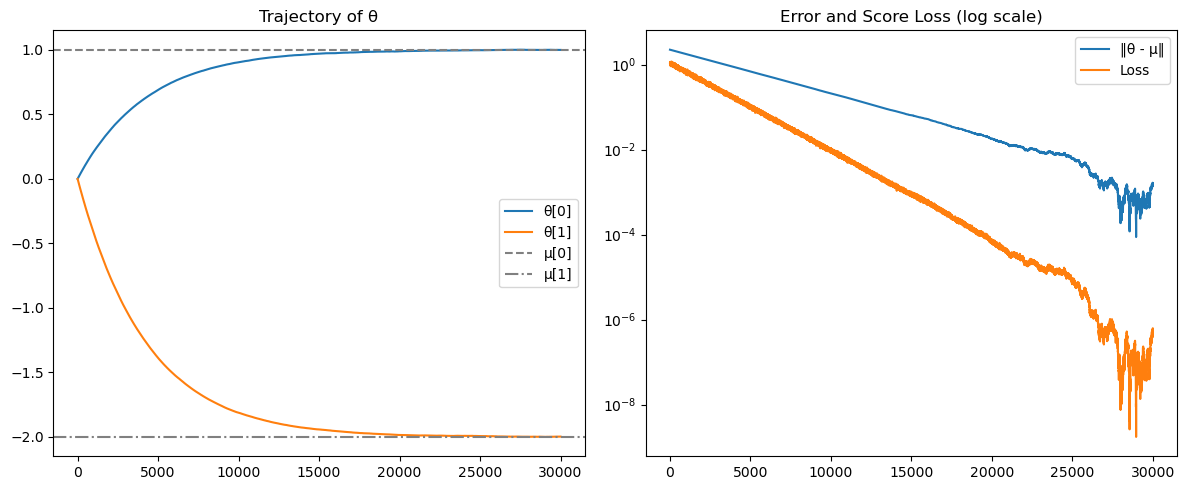

Saved: vectors_over_time.parquet and score_over_time.parquet


In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

dim = 2
mu_true = torch.tensor([1.0, -2.0], device=device)
beta = 1e8
initial_lr = 1e-3
total_steps = 30000
avg_window = 100

def simulate_xt(x0, t):
    m_t = torch.exp(-t)
    sigma_t = torch.sqrt(1 - torch.exp(-2 * t))
    z = torch.randn_like(x0)
    xt = m_t[:, None] * x0 + sigma_t[:, None] * z
    return xt, z, m_t, sigma_t

def sgld_step(theta, step, batch, beta):
    tau, x0, z = batch
    m_t = torch.exp(-tau)
    sigma_t = torch.sqrt(1 - torch.exp(-2 * tau))
    x_t = m_t[:, None] * x0 + sigma_t[:, None] * z

    s_val = - x_t + m_t[:, None] * theta
    grad_s = m_t[:, None]
    term = (z / sigma_t[:, None]) + s_val
    H = 2 * m_t * sigma_t**2
    grad = (H[:, None] * term * grad_s).mean(dim=0)

    lr = initial_lr
    noise = torch.randn_like(theta)
    theta_next = theta - lr * grad + torch.sqrt(torch.tensor(2 * lr / beta, device=theta.device)) * noise

    if step % 5000 == 0:
        print(f"[{step}] grad norm: {grad.norm().item():.6f} | theta: {theta.cpu().numpy()}")

    return theta_next

def loss_fn(theta, x0, tau, z):
    m_t = torch.exp(-tau)
    sigma_t = torch.sqrt(1 - torch.exp(-2 * tau))
    xt = m_t[:, None] * x0 + sigma_t[:, None] * z
    score = m_t[:, None] * (xt - theta)
    target = m_t[:, None] * (xt - mu_true)
    return ((score - target) ** 2).mean().item()

def get_data_loader(mu, batch_size=128, dim=2):
    while True:
        yield torch.randn(batch_size, dim, device=device) + mu

theta = torch.zeros(dim, device=device)
theta_history = []
error_history = []
loss_history = []
data = get_data_loader(mu=mu_true, batch_size=128, dim=dim)


taus_all = []
m_t_all = []
x_t_all = []
theta_all = []
s_val_all = []


for step in tqdm(range(total_steps)):
    tau = torch.rand(128, device=device) * (1.0 - 1e-3) + 1e-3 
    x0 = next(data)
    _, z, _, _ = simulate_xt(x0, tau)
    batch = (tau, x0, z)

    theta = sgld_step(theta, step, batch, beta)


    with torch.no_grad():
        m_t = torch.exp(-tau)
        sigma_t = torch.sqrt(1 - torch.exp(-2 * tau))
        x_t = m_t[:, None] * x0 + sigma_t[:, None] * z
        s_val = -x_t + m_t[:, None] * theta

        taus_all.append(tau.detach().cpu())
        m_t_all.append(m_t.detach().cpu())
        x_t_all.append(x_t.detach().cpu())
        theta_all.append(theta.detach().cpu().expand_as(x_t).cpu())
        s_val_all.append(s_val.detach().cpu())


    err = torch.norm(theta - mu_true).item()
    loss = loss_fn(theta, x0, tau, z)

    theta_history.append(theta.detach().cpu().numpy())
    error_history.append(err)
    loss_history.append(loss)

    if step % 1000 == 0:
        print(f"Step {step:5d} | θ = {theta.cpu().numpy()} | error = {err:.4f} | loss = {loss:.4f}")

theta_np = np.array(theta_history)
theta_avg = np.mean(theta_np[-avg_window:], axis=0)

print(f"\nFinal θ estimate (avg over last {avg_window}): {theta_avg}")
print(f"True μ = {mu_true.cpu().numpy()}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(theta_np[:, 0], label='θ[0]')
plt.plot(theta_np[:, 1], label='θ[1]')
plt.axhline(mu_true[0].item(), color='grey', linestyle='--', label='μ[0]')
plt.axhline(mu_true[1].item(), color='grey', linestyle='-.', label='μ[1]')
plt.legend()
plt.title("Trajectory of θ")

plt.subplot(1, 2, 2)
plt.plot(error_history, label='‖θ - μ‖')
plt.plot(loss_history, label='Loss')
plt.yscale('log')
plt.legend()
plt.title("Error and Score Loss (log scale)")

plt.tight_layout()
plt.show()

taus_all = torch.cat(taus_all)
m_t_all = torch.cat(m_t_all)
x_t_all = torch.cat(x_t_all)
theta_all = torch.cat(theta_all)
s_val_all = torch.cat(s_val_all)

df_main = pd.DataFrame({
    "tau": taus_all.numpy(),
    "m_t": m_t_all.numpy(),
    "x[0]": x_t_all[:, 0].numpy(),
    "x[1]": x_t_all[:, 1].numpy(),
    "theta[0]": theta_all[:, 0].numpy(),
    "theta[1]": theta_all[:, 1].numpy(),
})

df_score = pd.DataFrame({
    "score[0]": s_val_all[:, 0].numpy(),
    "score[1]": s_val_all[:, 1].numpy(),
})

df_main.to_parquet("vectors_over_time.parquet")
df_score.to_parquet("score_over_time.parquet")

print("Saved: vectors_over_time.parquet and score_over_time.parquet")

In [21]:
w2_x0 = abs((mu_true[0]-theta[0]).item())
w2_x1 = abs((mu_true[1]-theta[1]).item())


print(f"1D W2 X[0]: {float(w2_x0):.6f}")
print(f"1D W2 X[1]: {float(w2_x1):.6f}")


1D W2 X[0]: 0.000117
1D W2 X[1]: 0.001594
